In [112]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from numpy import average
from matplotlib.pyplot import figure

In [113]:
#%reset

In [114]:
#import CSVs, assign headers and remove quotations from column headers
red_wine = pd.read_csv(r'C:\Users\Killian\Projects\Wine analysis\Wine data\winequality-red.csv', sep=':|;',header=0, engine='python')
red_wine.columns = red_wine.columns.str.strip('"')
white_wine = pd.read_csv(r'C:\Users\Killian\Projects\Wine analysis\Wine data\winequality-white.csv', sep=':|;',header=0, engine='python')
white_wine.columns=white_wine.columns.str.strip('"')

In [115]:
#Alternative methods for removing quotation marks.
#red_wine.columns = red_wine.columns.str.replace(r"[\"]", '')
#red_wine.columns = red_wine.columns.str.replace('"','')
#white_wine.columns = [col[1:-1] for col in white_wine.columns]


In [116]:
#checking if red wine info consistent with description
red_wine.info()
print(red_wine.shape)
print(red_wine.head(10))
print(red_wine.tail(10))
print(red_wine.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
(1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           7.40              0.70   

In [117]:
#checking if white wine info consistent with description
white_wine.info()
print(white_wine.shape)
print(white_wine.head(10))
print(white_wine.tail(10))
print(white_wine.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
(4898, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           7.00              0.27   

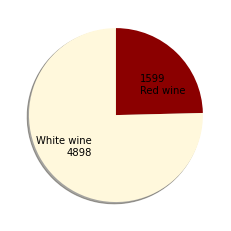

In [118]:
#Create a pie chart to show quantities of red vs white wine in dataframes. 
#Some difficulty in getting the actual values to display on the chart, as by default autopct will just show the percentage.
# So a custom function was used to calculate the original value from the input array back by comparing the difference between the calculated 
# value and the input array. This function is then called by autopct to apply the value to the appropriate wedge.

wines_p = np.array([red_wine.shape[0], white_wine.shape[0]])

def absolute_value(val):
    a  = wines_p[np.abs(wines_p - val/100.*wines_p.sum()).argmin()]
    return a

plt.pie(wines_p, labels=['Red wine', 'White wine'], colors=['darkred', 'cornsilk'], pctdistance=0.6, autopct=absolute_value, 
shadow=True, labeldistance=0.4, startangle=90, counterclock=False, frame=False)
plt.show()

In [119]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categorical data type (specific to pandas) instead of simple string
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

In [120]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categorical data type (specific to pandas) instead of simple string
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

In [121]:
#Create a new dataset combining red and white wines
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'
wines = pd.concat([red_wine, white_wine])

# re-shuffle records just to randomize data points as you may have a problem when fitting machine learning model. Dataset may not be split in a fair way.
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

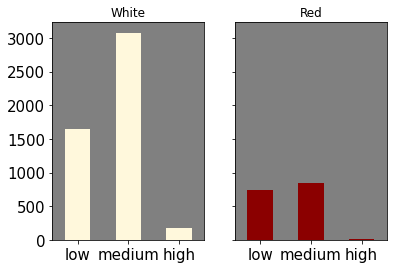

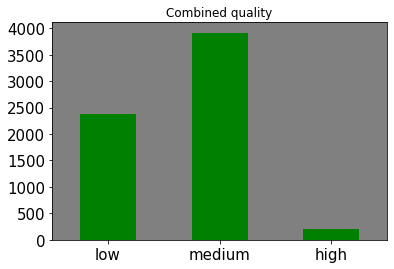

In [122]:
# Plot to show the distribution of qualities. 
# We need to be careful with weighting this data as it is a very unbalanced set. 
# Also it does not look like we should take the quality split (low/med/high)... investigate a better split. 

label_sort=pd.Categorical(['low', 'medium', 'high'], ordered=True)

qred=pd.DataFrame(data=(red_wine['quality_label'].value_counts().sort_index(level=label_sort)))
qwhite=pd.DataFrame(data=(white_wine['quality_label'].value_counts().sort_index(level=label_sort)))
quality=pd.DataFrame(data=(wines['quality_label'].value_counts().sort_index(level=label_sort)))

figure, axes = plt.subplots(1, 2, sharey=True)
plt.subplots_adjust(hspace=.0)
qwhite.plot(ax=axes[0], kind='bar', rot=0, fontsize=15, legend=None, color='cornsilk'); axes[0].set_title('White')
qred.plot(ax=axes[1], kind='bar', rot=0, fontsize=15, legend=None, color='darkred'); axes[1].set_title('Red')

quality.plot(y="quality_label", kind="bar", rot=0, fontsize=15, legend=None, color='g').set_title('Combined quality');

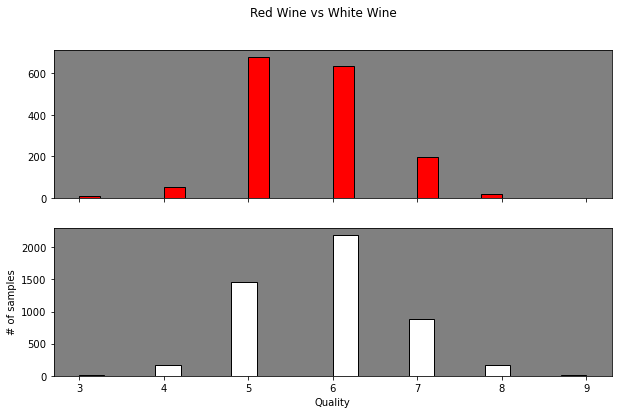

In [123]:
#Plotting the distribtion of quality scores we can see vast majorty are 5, 6 or 7. As such, the quality labels should be further subdivided. Suggestion: Low (3-4) Medium low (5) Medium (6) Medium high (7) High (8-9)

fig, axs = plt.subplots(2, figsize=(10,6), sharex=True, sharey=False)
fig.suptitle('Red Wine vs White Wine')
plt.xlabel('Quality')
plt.ylabel('# of samples')
axs[0].hist(red_wine['quality'], bins = 20, color='red', edgecolor='black')
axs[1].hist(white_wine['quality'], bins = 20, color='white', edgecolor='black')
plt.show()

In [124]:
#Redefining "quality_label" based on observations of data distribution

red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 4 else 'medium-low'
if value == 5 else 'medium' if value == 6 else 'medium-high' if value == 7 else 'high')

white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 4 else 'medium-low'
if value == 5 else 'medium' if value == 6 else 'medium-high' if value == 7 else 'high')

red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium-low', 'medium', 'medium-high', 'high'])

white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium-low', 'medium', 'medium-high', 'high'])

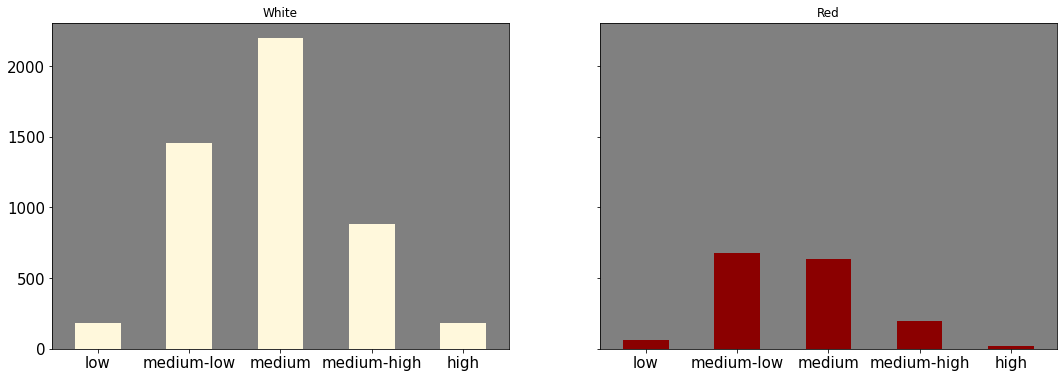

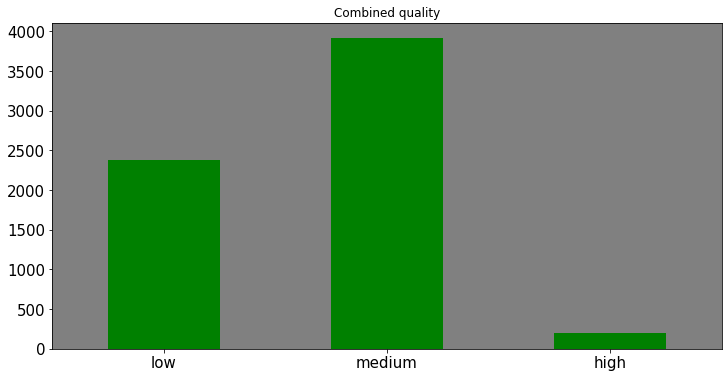

In [125]:
#Checking visually to see new distribution. Slightly more equitable. Still very few high quality wines.
label_sort=pd.Categorical(['low', 'medium-low', 'medium', 'medium-high', 'high'], ordered=True)

qred=pd.DataFrame(data=(red_wine['quality_label'].value_counts().sort_index(level=label_sort)))
qwhite=pd.DataFrame(data=(white_wine['quality_label'].value_counts().sort_index(level=label_sort)))
quality=pd.DataFrame(data=(wines['quality_label'].value_counts().sort_index(level=label_sort)))

figure, axes = plt.subplots(1, 2, sharey=True, figsize=(18, 6))
plt.subplots_adjust(hspace=.0)
plt.rcParams['axes.facecolor'] = 'grey'
qwhite.plot(ax=axes[0], kind='bar', rot=0, fontsize=15, legend=None, color='cornsilk'); axes[0].set_title('White')
qred.plot(ax=axes[1], kind='bar', rot=0, fontsize=15, legend=None, color='darkred'); axes[1].set_title('Red')

quality.plot(y="quality_label", kind="bar", rot=0, fontsize=15, legend=None, color='g', figsize=(12, 6)).set_title('Combined quality');

In [126]:
#Create a new dataset combining red and white wines
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'
wines = pd.concat([red_wine, white_wine])

# re-shuffle records just to randomize data points as you may have a problem when fitting machine learning model. Dataset may not be split in a fair way.
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

In [127]:
#%reset

In [128]:
red_wine.columns[0 : 2]

Index(['fixed acidity', 'volatile acidity'], dtype='object')

,Red Wine,White Wine
,fixed acidity,fixed acidity
count,1599.00,4898.00
mean,8.32,6.85
std,1.74,0.84
min,4.60,3.80
25%,7.10,6.30
50%,7.90,6.80
75%,9.20,7.30
max,15.90,14.20


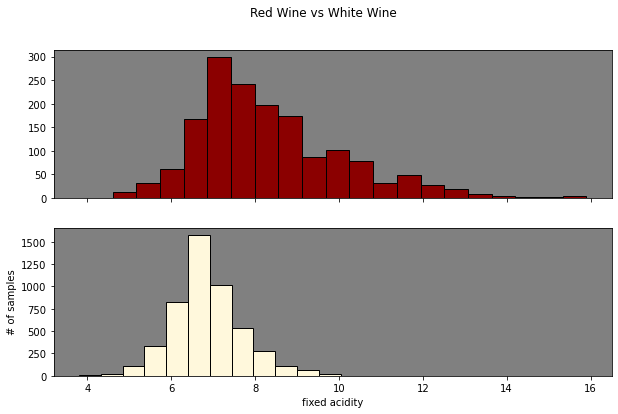

,Red Wine,White Wine
,volatile acidity,volatile acidity
count,1599.00,4898.00
mean,0.53,0.28
std,0.18,0.10
min,0.12,0.08
25%,0.39,0.21
50%,0.52,0.26
75%,0.64,0.32
max,1.58,1.10


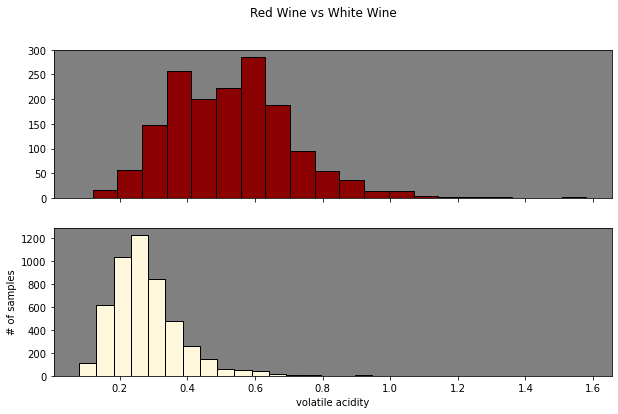

,Red Wine,White Wine
,citric acid,citric acid
count,1599.00,4898.00
mean,0.27,0.33
std,0.19,0.12
min,0.00,0.00
25%,0.09,0.27
50%,0.26,0.32
75%,0.42,0.39
max,1.00,1.66


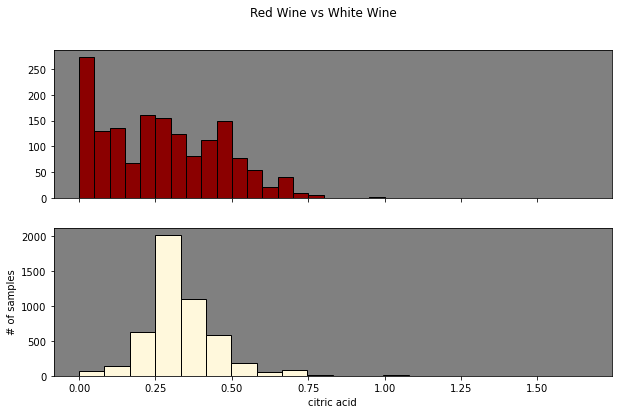

,Red Wine,White Wine
,residual sugar,residual sugar
count,1599.00,4898.00
mean,2.54,6.39
std,1.41,5.07
min,0.90,0.60
25%,1.90,1.70
50%,2.20,5.20
75%,2.60,9.90
max,15.50,65.80


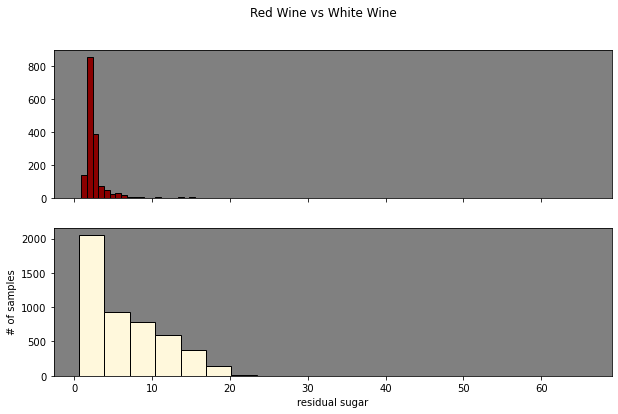

,Red Wine,White Wine
,chlorides,chlorides
count,1599.00,4898.00
mean,0.09,0.05
std,0.05,0.02
min,0.01,0.01
25%,0.07,0.04
50%,0.08,0.04
75%,0.09,0.05
max,0.61,0.35


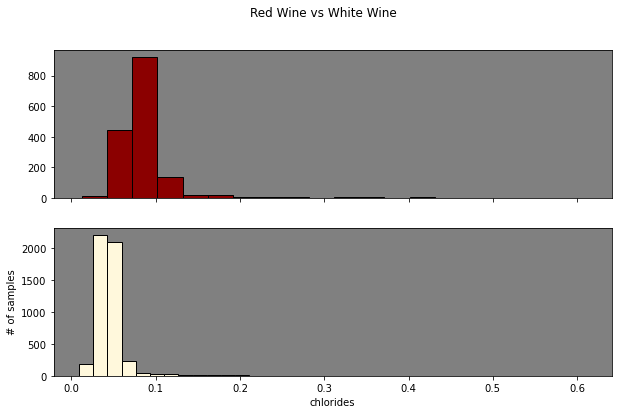

,Red Wine,White Wine
,free sulfur dioxide,free sulfur dioxide
count,1599.00,4898.00
mean,15.87,35.31
std,10.46,17.01
min,1.00,2.00
25%,7.00,23.00
50%,14.00,34.00
75%,21.00,46.00
max,72.00,289.00


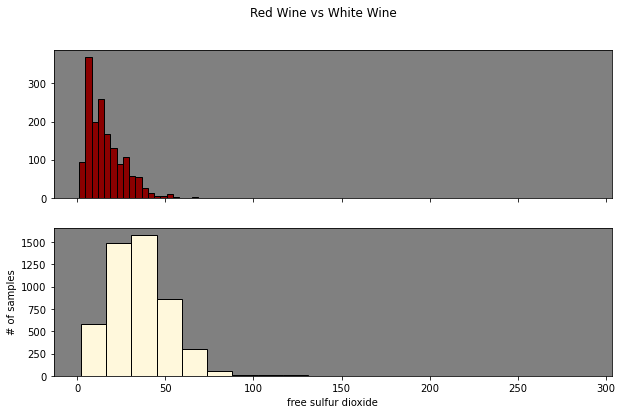

,Red Wine,White Wine
,total sulfur dioxide,total sulfur dioxide
count,1599.00,4898.00
mean,46.47,138.36
std,32.90,42.50
min,6.00,9.00
25%,22.00,108.00
50%,38.00,134.00
75%,62.00,167.00
max,289.00,440.00


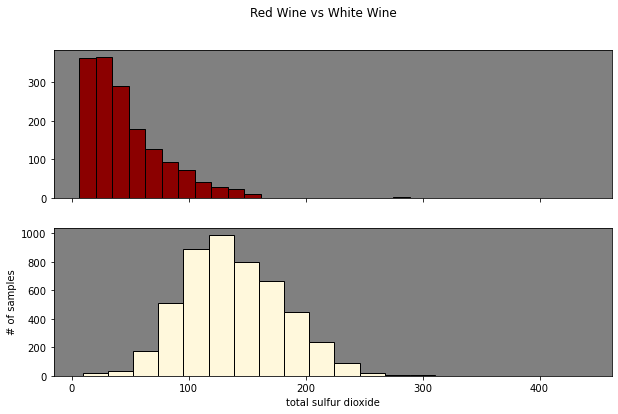

,Red Wine,White Wine
,density,density
count,1599.00,4898.00
mean,1.00,0.99
std,0.00,0.00
min,0.99,0.99
25%,1.00,0.99
50%,1.00,0.99
75%,1.00,1.00
max,1.00,1.04


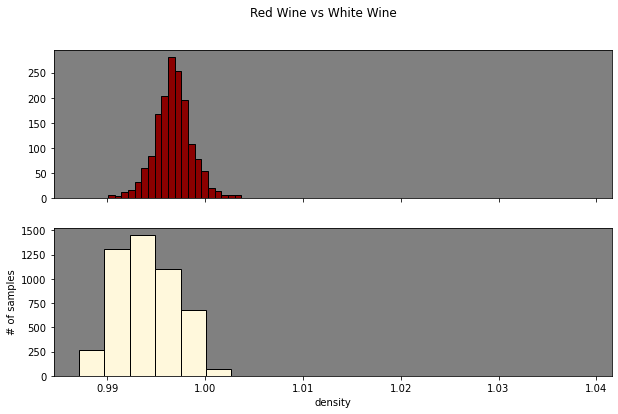

,Red Wine,White Wine
,pH,pH
count,1599.00,4898.00
mean,3.31,3.19
std,0.15,0.15
min,2.74,2.72
25%,3.21,3.09
50%,3.31,3.18
75%,3.40,3.28
max,4.01,3.82


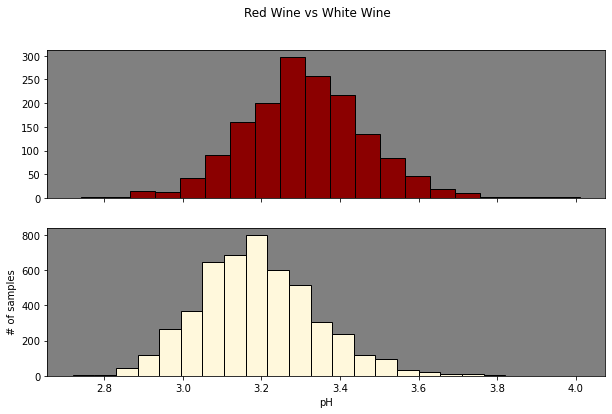

,Red Wine,White Wine
,sulphates,sulphates
count,1599.00,4898.00
mean,0.66,0.49
std,0.17,0.11
min,0.33,0.22
25%,0.55,0.41
50%,0.62,0.47
75%,0.73,0.55
max,2.00,1.08


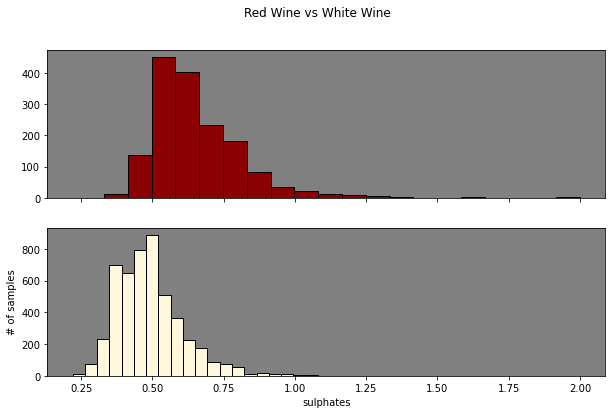

,Red Wine,White Wine
,alcohol,alcohol
count,1599.00,4898.00
mean,10.42,10.51
std,1.07,1.23
min,8.40,8.00
25%,9.50,9.50
50%,10.20,10.40
75%,11.10,11.40
max,14.90,14.20


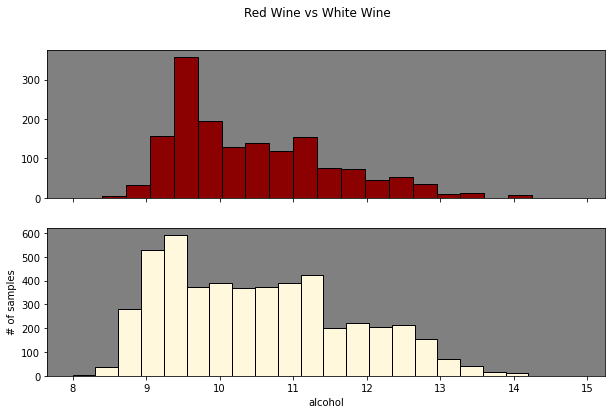

In [129]:
#Compare descriptive stats on the red & white wine datasets.
pd.set_option('display.float_format', lambda x: '%.2f' % x) #set float to only have two decimal places
#compare each attribute separately using a simple for loop

for column in red_wine.columns[0 : -3]:
        display(pd.concat([red_wine[[column]], white_wine[[column]]], axis=1, keys=['Red Wine','White Wine']).describe())
        fig, axs = plt.subplots(2, figsize=(10,6), sharex=True, sharey=False)
        fig.suptitle('Red Wine vs White Wine')
        plt.xlabel(column)
        plt.ylabel('# of samples')
        axs[0].hist(red_wine[column], bins = 20, color='darkred', edgecolor='black')
        axs[1].hist(white_wine[column], bins = 20, color='cornsilk', edgecolor='black')
        plt.show()
#used axis=1 to put them side by side. The keys allow for headings. Describe gives basics stats for comparison work.
# Observations: 
# FIXED ACIDITY: Big std on red wine despite similar characteristics otherwise. ~25% difference in mean.
# VOLATILE ACIDITY: Higher across the board for red wines and more variability (std)
# CITRIC ACID: +ve skew for white wine. Overall numbers similar otherwise though white wine max much higher. Outlier?
# RESIDUAL SUGAR: Huge differences. Higher mean/std in white and overall much higher levels. 
# CHLORIDES: Low levels but red wines consistently approx double. 
# FREE SUFUR DIOXIDE: Low levels and less spread in red wine. Generally higher levels in white (~double)
# TOTAL SUFUR DIOXIDE: Positive skew distribution white wine (but close to classic curve) 0-300. Red wine mostly below 50 then sharply tails off.  
# DENSITY: Needs to be done separately as using two decimal points reduces the usability of the data. Typically 3 decimal places, in doc it has 4. SHOULD THIS BE SPECIFIC GRAVITY? DENSITY IS RELATIVE I.E. NO DIMENSIONS
# PH: Similar across both wines. White wines trend towards being slightly more acidic. 
# SULFATES: Red wines seem to consistently have elevated sulfate levels compared to white wine. 
# ALCOHOL: Well, it's alcohol. While relatively similar, white wines appear to have more of an even spread 9-14%. 
# QUALITY: Whole numbers. Minimum 3, maximum 9, from a range 0-10. Majority are 5/6, with some 7 and very little data on the rest. Caution to be used when correlating attributes to quality as outliers will have a major effect.
# QUALITY_LABEL: These bins are far too small. This way, most things will be medium quality, which is not very useful. Medium should have more granularity; maybe medium-low, medium-high.


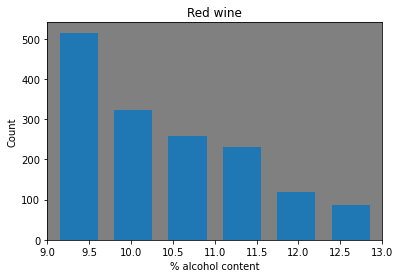

In [130]:
#Illustrating alcohol content of red wine and trimming the graph to remove low frequency outliers for ease of reading.

hist, bins = np.histogram(red_wine['alcohol'], bins=10)
freq = 0.05*(red_wine[column].shape[0])
hist[np.where(hist <= freq)] = 0
width = 0.7 * (bins[1]- bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.xlim(9, 13)
plt.title("Red wine")
plt.xlabel("% alcohol content")
plt.ylabel("Count")
plt.show()

In [131]:
#Three outputs wanted between quality and other wine attributes. Also separately and together. (red, white, red & white)
# 1) Plot on same graph with different axes 2) Overlay of plots 3) Correlation coefficient
# 


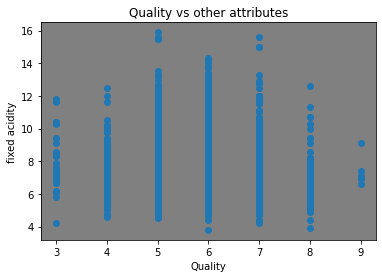

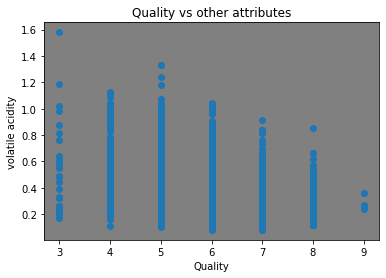

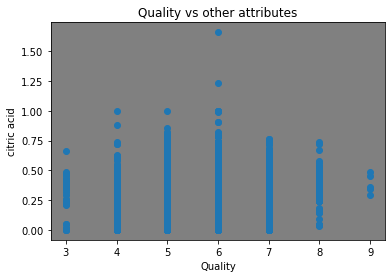

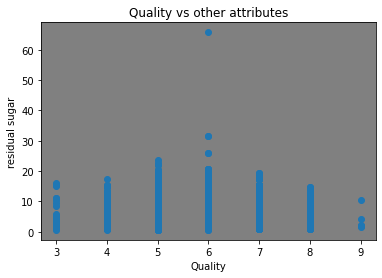

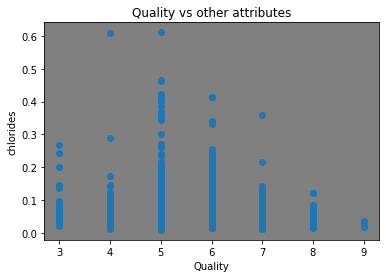

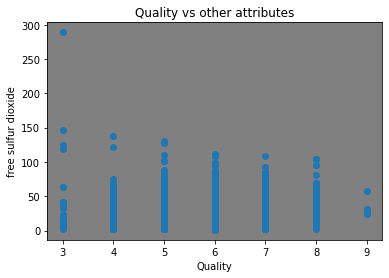

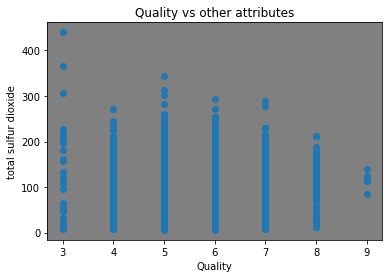

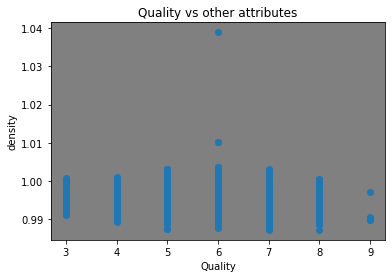

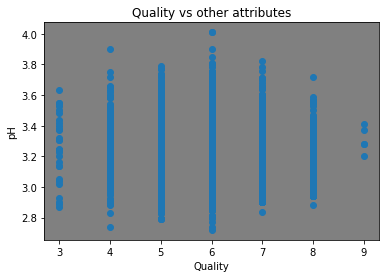

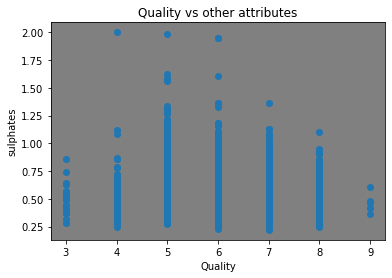

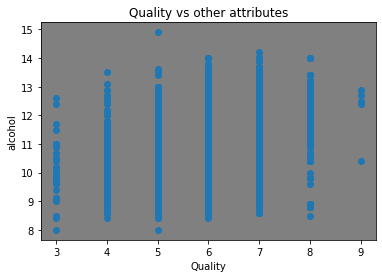

In [132]:
#Observations based on scatter plot:
# Careful with low number of samples at high quality

for column in wines.columns[0 : -3]:
    plt.scatter(wines['quality'], wines[column])
    plt.title('Quality vs other attributes')
    plt.ylabel(column)
    plt.xlabel('Quality')
    plt.show()

In [133]:
#%reset

In [134]:
distribution = red_wine['chlorides']
weights = red_wine['quality']

weighted_avg = round(average( distribution, weights = weights),2)

weighted_avg      

0.09

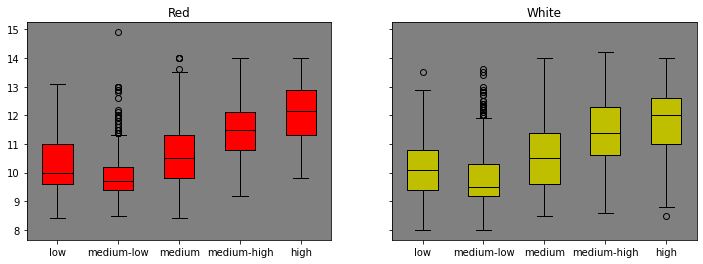

In [135]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)

# rectangular box plot
bplot1 = ax1.boxplot([red_wine[red_wine['quality_label'] == 'low']['alcohol'], red_wine[red_wine['quality_label'] == 'medium-low']['alcohol'], red_wine[red_wine['quality_label'] == 'medium']['alcohol'], red_wine[red_wine['quality_label'] == 'medium-high']['alcohol'], red_wine[red_wine['quality_label'] == 'high']['alcohol']],
                     patch_artist=True,  # fill with color
                     boxprops=dict(facecolor='r', color='k'), #Color box
                     medianprops=dict(color='k'), #Mean color
                     labels=['low', 'medium-low', 'medium', 'medium-high', 'high'])  # will be used to label x-ticks
ax1.set_title('Red')

bplot2 = ax2.boxplot([white_wine[white_wine['quality_label'] == 'low']['alcohol'], white_wine[white_wine['quality_label'] == 'medium-low']['alcohol'], white_wine[white_wine['quality_label'] == 'medium']['alcohol'], white_wine[white_wine['quality_label'] == 'medium-high']['alcohol'], white_wine[white_wine['quality_label'] == 'high']['alcohol']],
                     patch_artist=True,  
                     boxprops=dict(facecolor='y', color='k'), 
                     medianprops=dict(color='k'), 
                    labels=['low', 'medium-low', 'medium', 'medium-high', 'high'])
ax2.set_title('White')
plt.show()

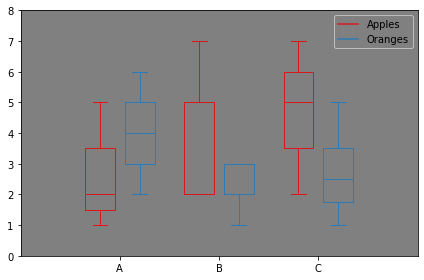

In [136]:
import matplotlib.pyplot as plt
import numpy as np

data_a = [[1,2,5], [5,7,2,2,5], [7,2,5]]
data_b = [[6,4,2], [1,2,5,3,2], [2,3,5,1]]

ticks = ['A', 'B', 'C']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Apples')
plt.plot([], c='#2C7BB6', label='Oranges')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 8)
plt.tight_layout()

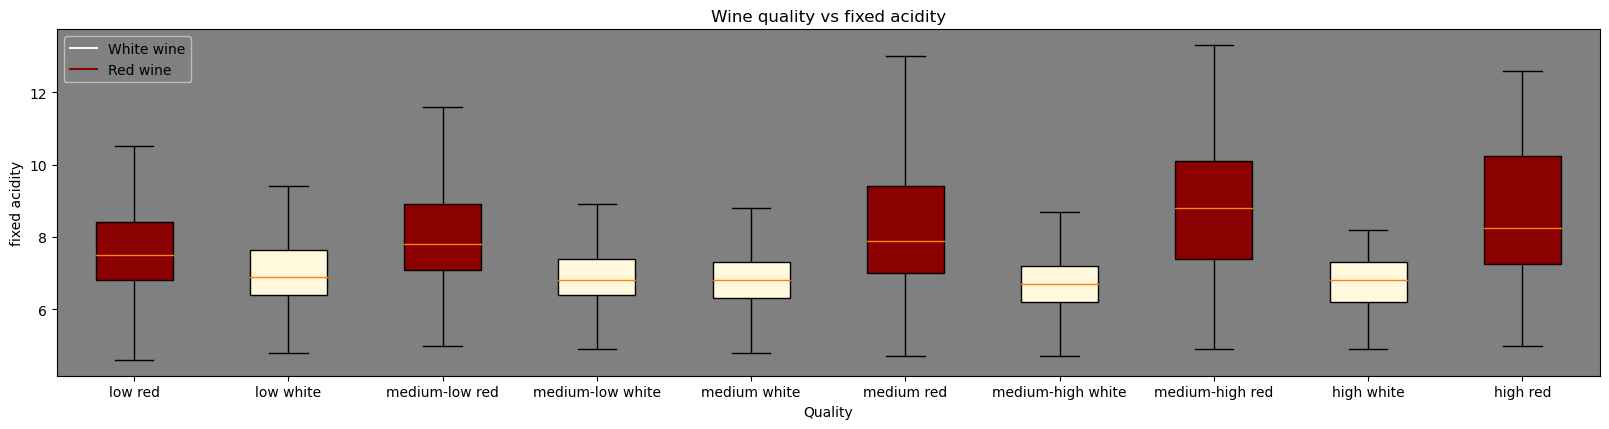

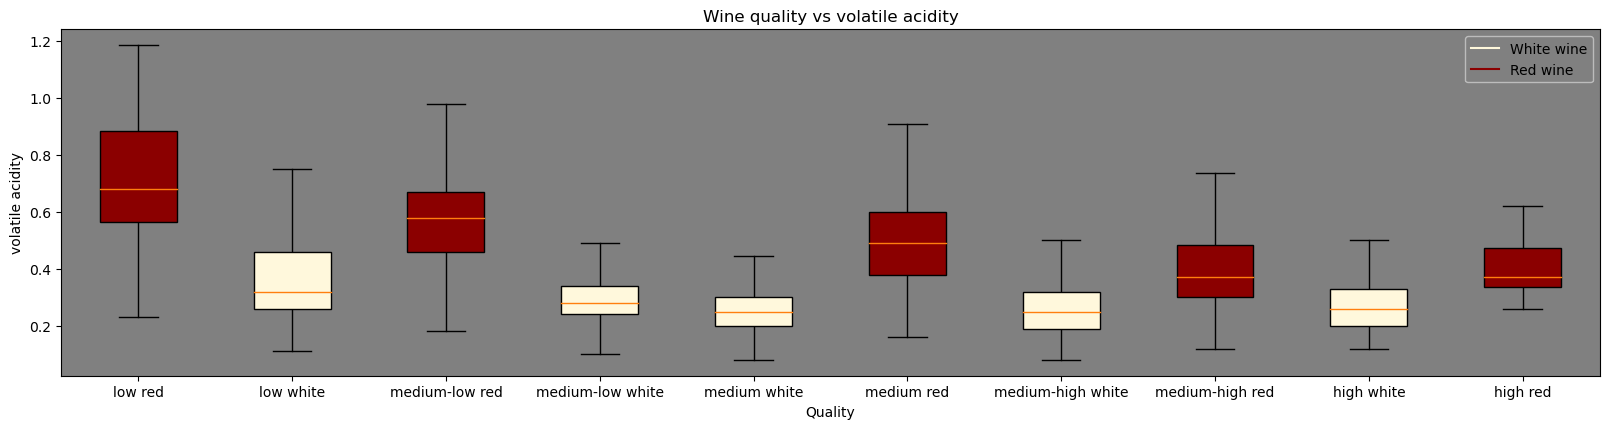

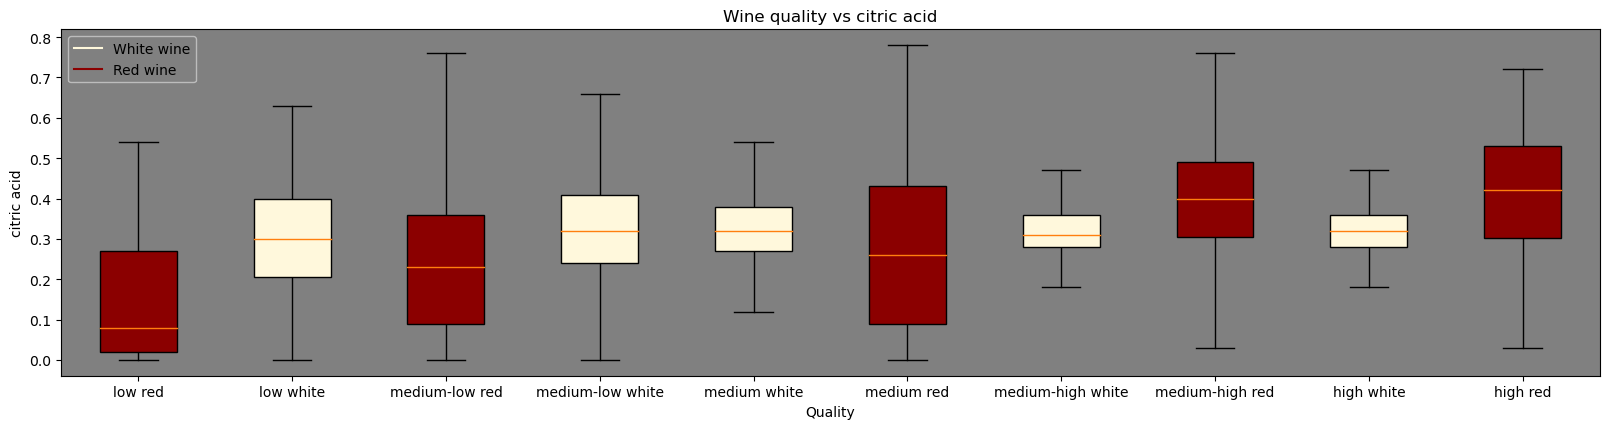

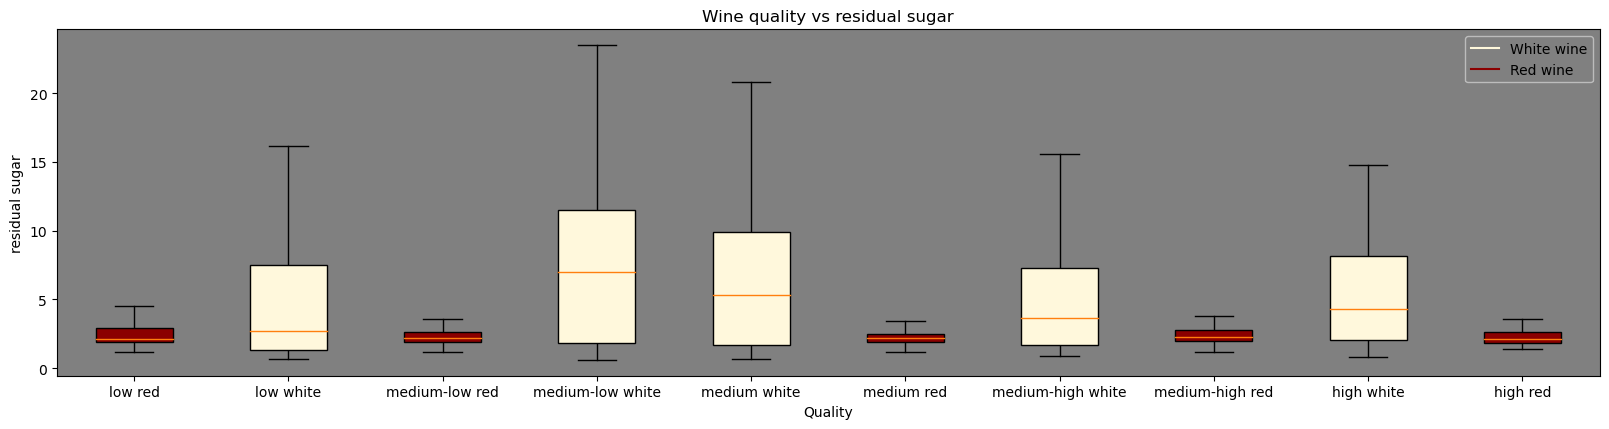

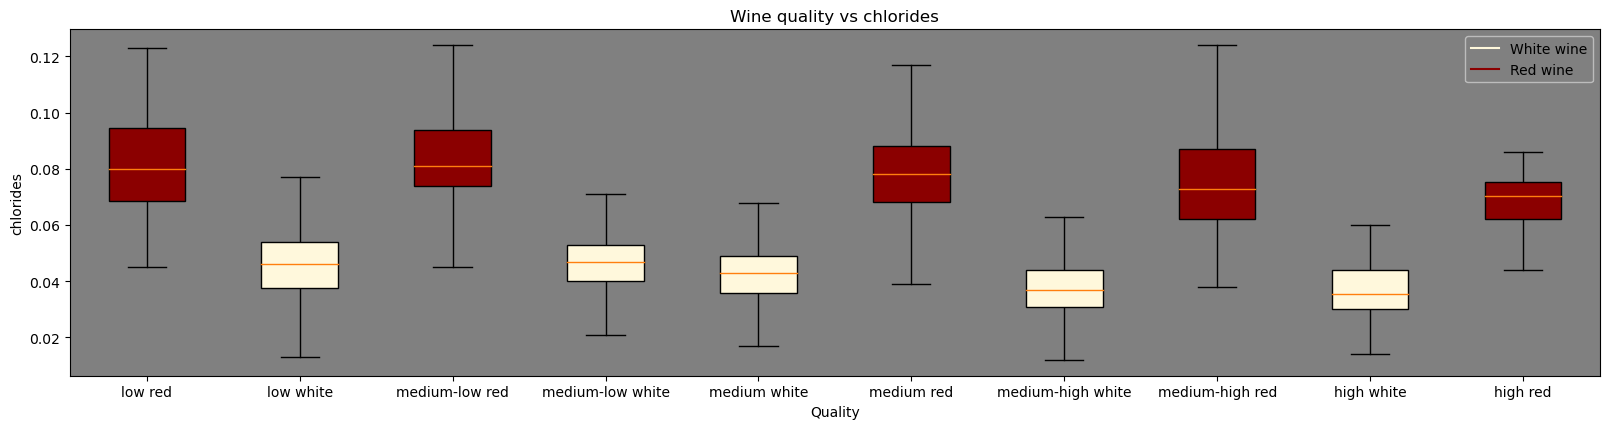

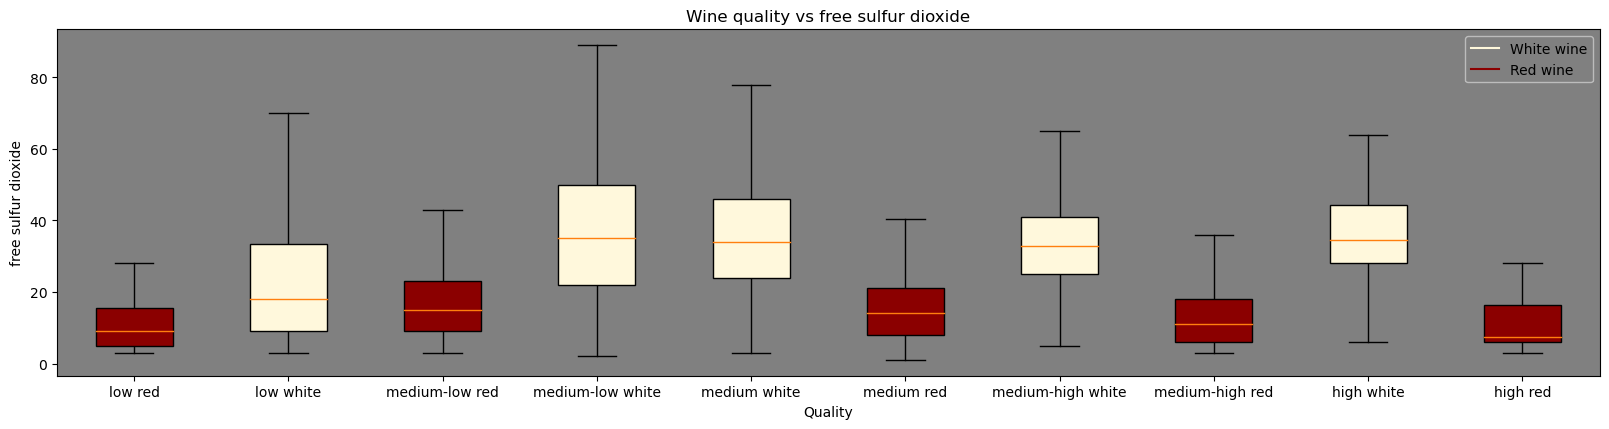

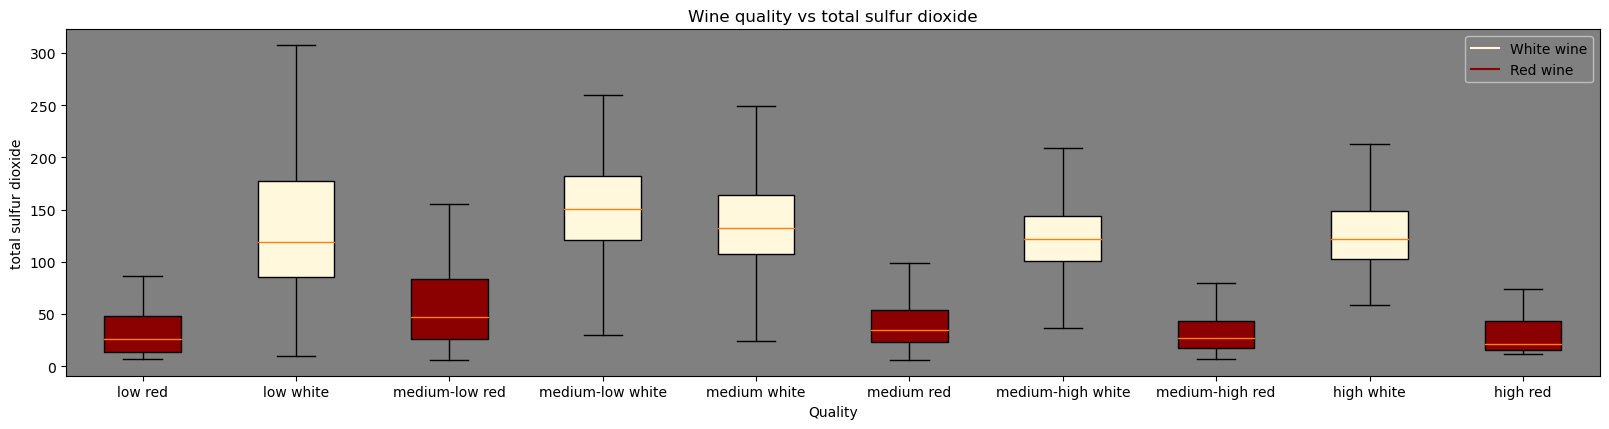

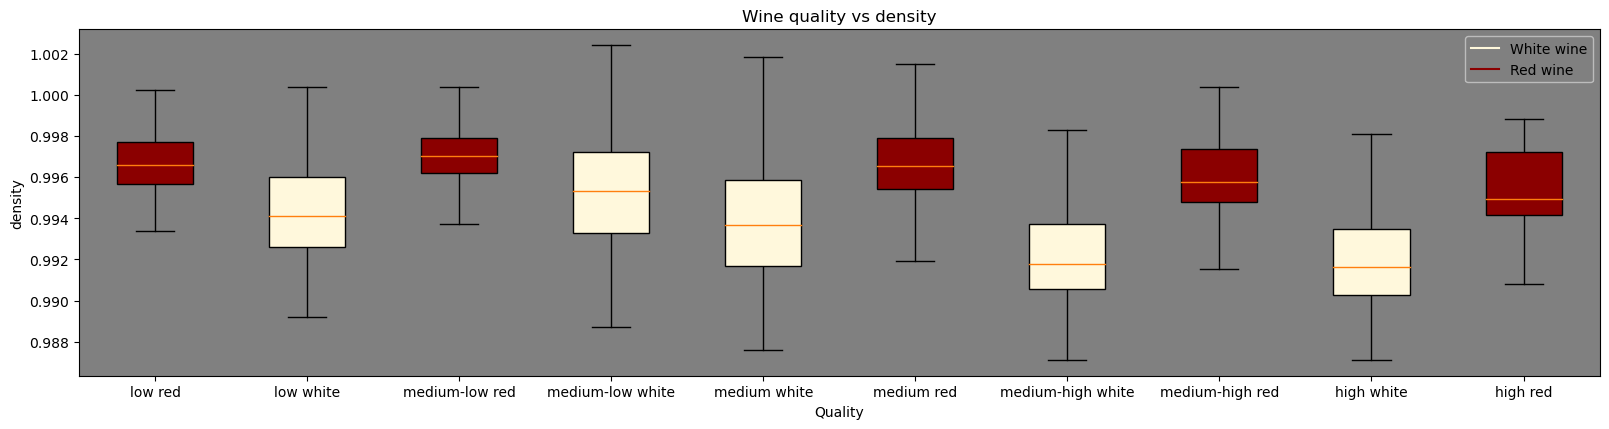

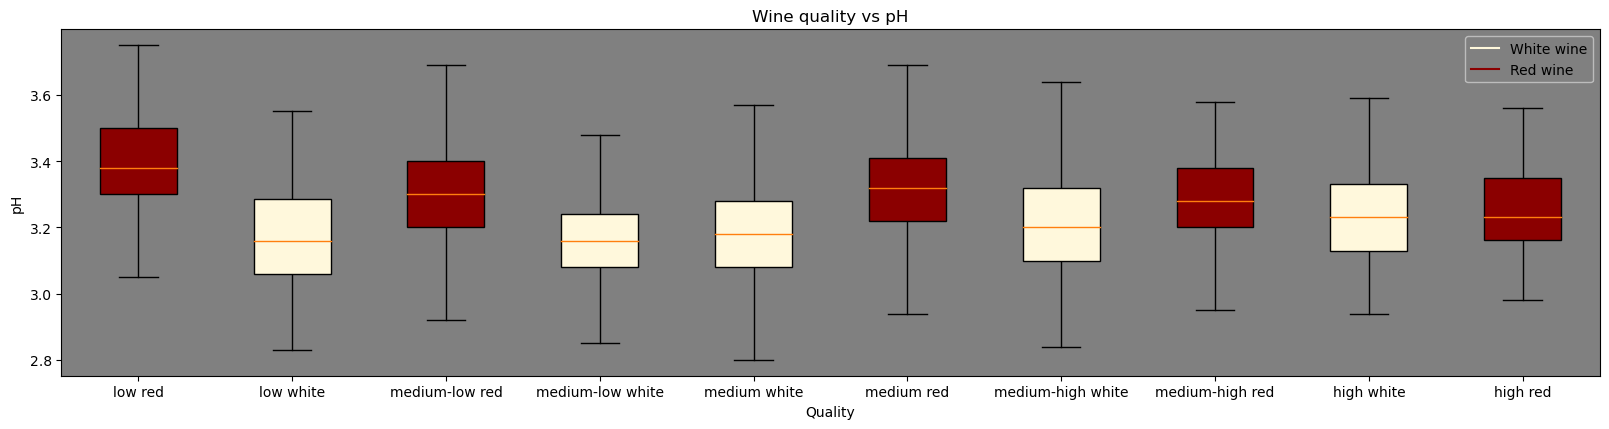

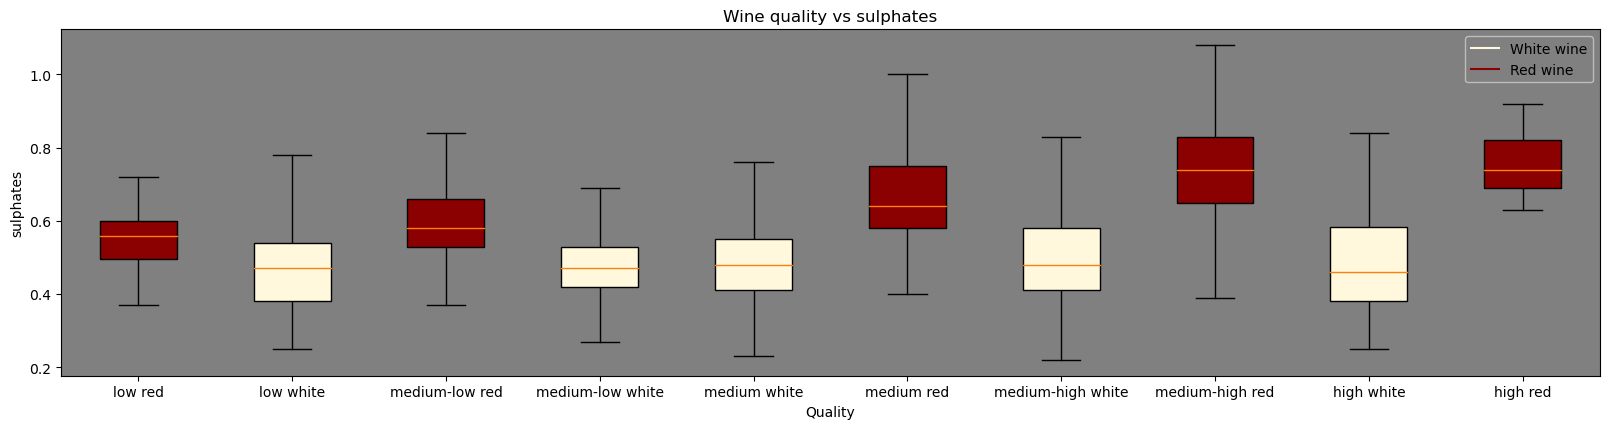

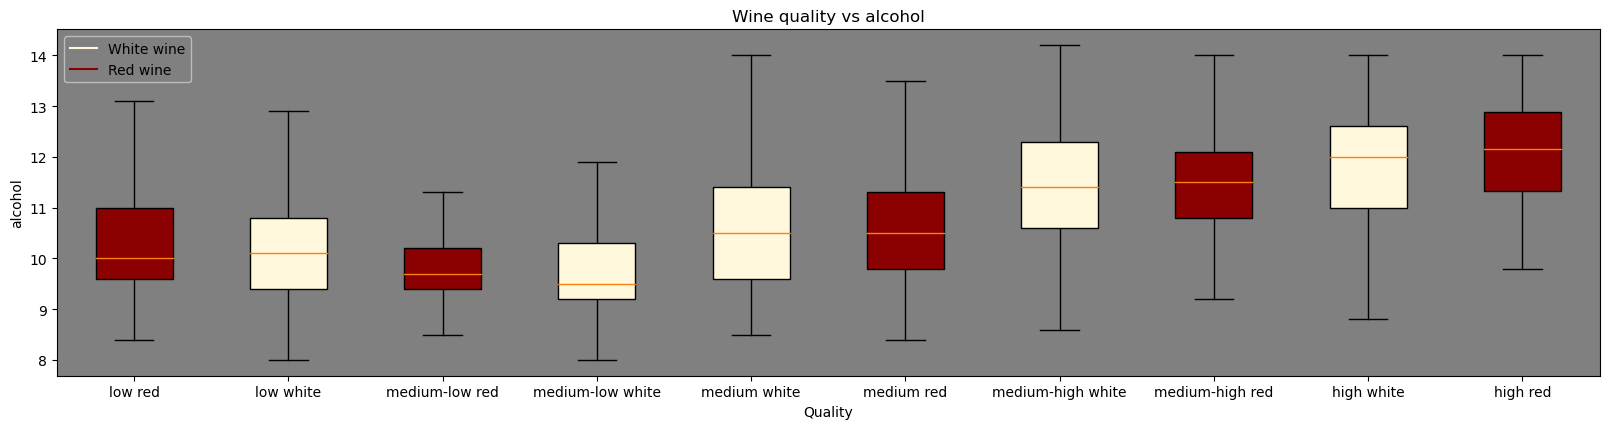

In [137]:
#UNFINISHED: want to do in pairs of plots, as tight as possible, labels should just be centred quality (not type). The way it's currently written it will be difficult to do this

for column in wines.columns[0 : -3]:
        quality_list = ['low','medium-low', 'medium', 'medium-high', 'high']
        quality_column = {}
        colors = []
        fig = plt.figure(figsize=(16, 4), dpi=100), #ax1
        #ax1.yaxis.grid(True, linestyle='-', which='major', color='b', alpha=0.5)
        for level in quality_list:
                for kind in wines[wines["quality_label"] == level]["wine_type"].unique():
                        label = level + " " + kind
                        quality_column[label] = wines[(wines['quality_label']==level) & (wines["wine_type"]==kind)][column]
                        colors.append("cornsilk" if kind == "white" else "darkred")
        bplot = plt.boxplot([x for x in quality_column.values()],labels=[x for x in quality_column.keys()], patch_artist=True, showfliers=False) #list comp to make boxplots, remove outliers
        for patch, color in zip(bplot['boxes'], colors):
                patch.set_facecolor(color)
                plt.tight_layout()
        plt.xlabel('Quality') 
        plt.ylabel(column)
        plt.plot([], c='cornsilk', label='White wine')
        plt.plot([], c='darkred', label='Red wine')
        plt.legend()
        plt.title('Wine quality vs ' + column)
        plt.show();

In [138]:
from scipy import stats

F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['alcohol'], wines[wines['quality_label'] == 'medium-low']['alcohol'],
wines[wines['quality_label'] == 'medium']['alcohol'], wines[wines['quality_label'] == 'medium-high']['alcohol'],
wines[wines['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistic: 480.66752094694067 	p-value: 0.0


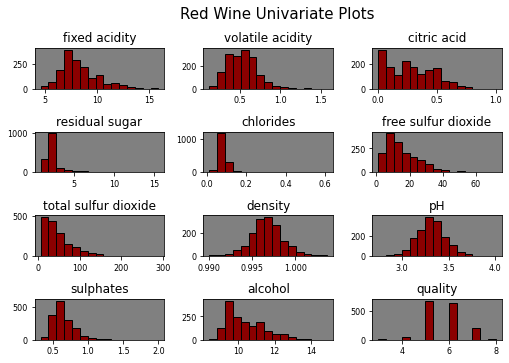

In [139]:
red_wine.hist(bins=15, color='darkred', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

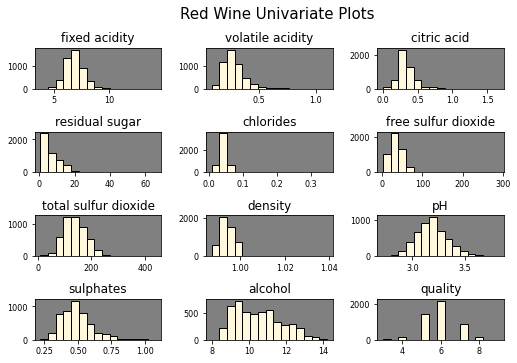

In [140]:
white_wine.hist(bins=15, color='cornsilk', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

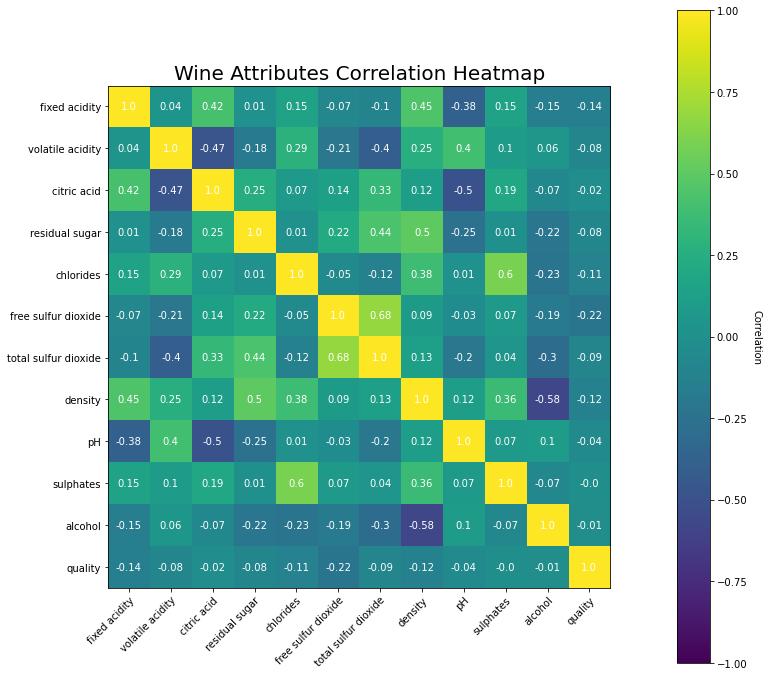

In [143]:
bwines = wines[wines["quality_label"] == "low"]
#bwines = wines[wines["quality_label"] == "high"]
numerics = ['int64', 'float64']
num_wines = bwines.select_dtypes(include=numerics)
ax_labels = num_wines.columns
corr_mat = bwines.corr().to_numpy()
cbarlabel = "Correlation"

fig, ax = plt.subplots()
im = ax.imshow(corr_mat, vmin=-1, vmax=1)

cbar = ax.figure.colorbar(im, ax=ax, pad=0.1)
cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

# We want to show all ticks...
ax.set_xticks(np.arange(len(ax_labels)))
ax.set_yticks(np.arange(len(ax_labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(ax_labels)
ax.set_yticklabels(ax_labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(ax_labels)):
    for j in range(len(ax_labels)):
        text = ax.text(i, j, corr_mat[i, j].round(decimals=2), ha="center", va="center", color="w")

ax.set_title("Wine Attributes Correlation Heatmap", size=20)
fig.set_figheight(12)
fig.set_figwidth(12)
#fig.tight_layout()
plt.show()